# Tasks:
## Data Understanding:
1. Find out how many labelled customer complaints are in the data
2. Find out the relative frequency of tags in the dataset
3. Check if there are any encoding issues (try to read the data using open() and see if you need to use any special text encoding options, other than utf-8)
4. Create a report that identifies how much of each complaint is composed of commonly used english stopwords.


| Complaint      | Percentage of stopwords |
| ----------- | ----------- |
| 1      | 20%       |
| 2   | 10%        |
| 3      | 50%       |
| 4      | 60%       |
| 5      | 30%       |

# EDA

Just looking at all the data we have available 

In [1]:
import pandas as pd

In [2]:
complaints = pd.read_json('../data/ticket_classification/complaints.json')

In [3]:
complaints.head()

,data
0,{'text': 'I recently opened a Citibank CitiGol...
1,{'text': 'I went into Capital One bank to open...
2,{'text': 'I try using my chase card at a baker...
3,{'text': 'Approximately a half hour ago I visi...
4,{'text': 'I have made a transaction using Chas...


----

In [4]:
mappings = pd.read_json('../data/ticket_classification/mappings.json')

In [5]:
mappings.head()

,all
APR or interest rate,cc_7
"Account opening, closing, or management",bc_3
Advertising and marketing,cc_13
Billing disputes,cc_0
Cancelling account,cc_1


----

In [6]:
respondent = pd.read_csv('../data/ticket_classification/respondent.csv')

In [7]:
respondent.head()

,issue_id,respondent_id
0,bc_0,r1
1,bc_1,r1
2,bc_2,r1
3,bc_3,r2
4,bc_4,r2


----

In [8]:
test = pd.read_csv('../data/ticket_classification/test.csv')

In [9]:
test.head()

,0
0,I was promised a web site that would generate ...
1,credit was to be repaired for myself. the cont...
2,Paid the balance due in full and then was char...
3,I pay my monthly balance to Capital One in ful...
4,I send my credit card payment on time every mo...


For the test file, we don't have any labels, so we have to use the model we train here, to make prediction for this text.

## Data cleaning

So let's convert the json we have, to workable dataframes. So that we can do our analysis and train our models on top.

In [10]:
complaints.head()

,data
0,{'text': 'I recently opened a Citibank CitiGol...
1,{'text': 'I went into Capital One bank to open...
2,{'text': 'I try using my chase card at a baker...
3,{'text': 'Approximately a half hour ago I visi...
4,{'text': 'I have made a transaction using Chas...


In [11]:
# Writing a function that get's us the text part from the json 
def get_text_from_json(x):
    try:
        text = x.get('text')
    except:
        text = None
    return (text)

# Writing a function that get's us the complain_id part from the json
def get_complaint_id_from_json(x):
    try:
        complaint_id = x.get('complaint_id')
    except:
        complaint_id = None
    return (complaint_id)

# We are going to apply this function to our dataframe row by row with the help of the (apply) attribute of the dataframe 

In [12]:
complaints['text'] = complaints['data'].apply(get_text_from_json)

In [13]:
# Now we have a comlumn that contains the text that we need.
complaints.head()

,data,text
0,{'text': 'I recently opened a Citibank CitiGol...,I recently opened a Citibank CitiGold Checking...
1,{'text': 'I went into Capital One bank to open...,I went into Capital One bank to open a checkin...
2,{'text': 'I try using my chase card at a baker...,I try using my chase card at a bakery departme...
3,{'text': 'Approximately a half hour ago I visi...,Approximately a half hour ago I visited a US B...
4,{'text': 'I have made a transaction using Chas...,I have made a transaction using Chase quickpay...


In [14]:
complaints['complaint_id'] = complaints['data'].apply(get_complaint_id_from_json)

In [15]:
# Now we have a comlumn that contains the complaint_id that we need.
complaints.head()

,data,text,complaint_id
0,{'text': 'I recently opened a Citibank CitiGol...,I recently opened a Citibank CitiGold Checking...,bc_5
1,{'text': 'I went into Capital One bank to open...,I went into Capital One bank to open a checkin...,bc_3
2,{'text': 'I try using my chase card at a baker...,I try using my chase card at a bakery departme...,bc_2
3,{'text': 'Approximately a half hour ago I visi...,Approximately a half hour ago I visited a US B...,bc_2
4,{'text': 'I have made a transaction using Chas...,I have made a transaction using Chase quickpay...,bc_6


Let us drop the data column, as we have already extracted the data that we needed from it into the 2 newly created columns.

In [16]:
complaints = complaints.drop('data',axis=1)

In [17]:
complaints

,text,complaint_id
0,I recently opened a Citibank CitiGold Checking...,bc_5
1,I went into Capital One bank to open a checkin...,bc_3
2,I try using my chase card at a bakery departme...,bc_2
3,Approximately a half hour ago I visited a US B...,bc_2
4,I have made a transaction using Chase quickpay...,bc_6
...,...,...
395,I am struggling to get the debt relief I am en...,lc_1
396,I turn in the car in 2010 as a voluntary repos...,lc_0
397,We set up payment for interest payment only fo...,lc_1
398,This regards a car loan financed by First Hawa...,lc_0


Now that we have a clean dataset, let's also join the 2nd json dataset called mappings.

## Joining tables

In [18]:
mappings.head()

,all
APR or interest rate,cc_7
"Account opening, closing, or management",bc_3
Advertising and marketing,cc_13
Billing disputes,cc_0
Cancelling account,cc_1


In [19]:
mappings_dict = mappings.to_dict().get('all')

In [20]:
mappings_dict

{'APR or interest rate': 'cc_7',
 'Account opening, closing, or management': 'bc_3',
 'Advertising and marketing': 'cc_13',
 'Billing disputes': 'cc_0',
 'Cancelling account': 'cc_1',
 'Cash advance fee': 'cc_6',
 'Company charging the account': 'bc_6',
 'Consumer Loan': 'lc_0',
 'Conventional adjustable mortgage (ARM)': 'mc_0',
 'Conventional fixed mortgage': 'mc_1',
 'Conventional home mortgage': 'mc_2',
 'Credit card protection': 'cc_3',
 'Credit determination': 'cc_5',
 'Customer service': 'cc_2',
 'Delinquent account': 'cc_11',
 'Deposits and withdrawals': 'bc_4',
 'FHA mortgage': 'mc_3',
 'Fraud': 'cc_8',
 'Late fee': 'cc_14',
 'Managing an account': 'bc_5',
 'Other': 'cc_12',
 'Other fee': 'cc_10',
 'Payday loan': 'lc_2',
 'Payoff process': 'cc_15',
 'Problem caused by your funds being low': 'bc_1',
 'Problems caused by my funds being low': 'bc_0',
 'Rewards': 'cc_4',
 'Student loan': 'lc_1',
 'Transaction issue': 'cc_9',
 'Using a debit or ATM card': 'bc_2',
 'VA mortgage': 'mc

Reversing the key and value for the dictionary

In [21]:
mappings_dict = dict((v, k) for k, v in mappings_dict.items())

Applying the dictionary to our dataframe

In [22]:
complaints['complaint_text'] = complaints['complaint_id'].map(mappings_dict)

In [23]:
complaints

,text,complaint_id,complaint_text
0,I recently opened a Citibank CitiGold Checking...,bc_5,Managing an account
1,I went into Capital One bank to open a checkin...,bc_3,"Account opening, closing, or management"
2,I try using my chase card at a bakery departme...,bc_2,Using a debit or ATM card
3,Approximately a half hour ago I visited a US B...,bc_2,Using a debit or ATM card
4,I have made a transaction using Chase quickpay...,bc_6,Company charging the account
...,...,...,...
395,I am struggling to get the debt relief I am en...,lc_1,Student loan
396,I turn in the car in 2010 as a voluntary repos...,lc_0,Consumer Loan
397,We set up payment for interest payment only fo...,lc_1,Student loan
398,This regards a car loan financed by First Hawa...,lc_0,Consumer Loan


If you want to, you can drop the complaint_id here, i am not going to do so. I am just going to let it be and use the complaint text for my EDA, as it would be more meaningful to the end user.

## Task 1
### Find out how many labelled customer complaints are in the data

In [24]:
complaints.isna().sum()

text              0
complaint_id      0
complaint_text    0
dtype: int64

That is great, we have no missing values here

In [25]:
complaints.shape

(400, 3)

So, that would mean that we have a total of **400** labelled customer complaints in our data

-----

## Task 2
### Find out the relative frequency of tags in the dataset

<AxesSubplot:>

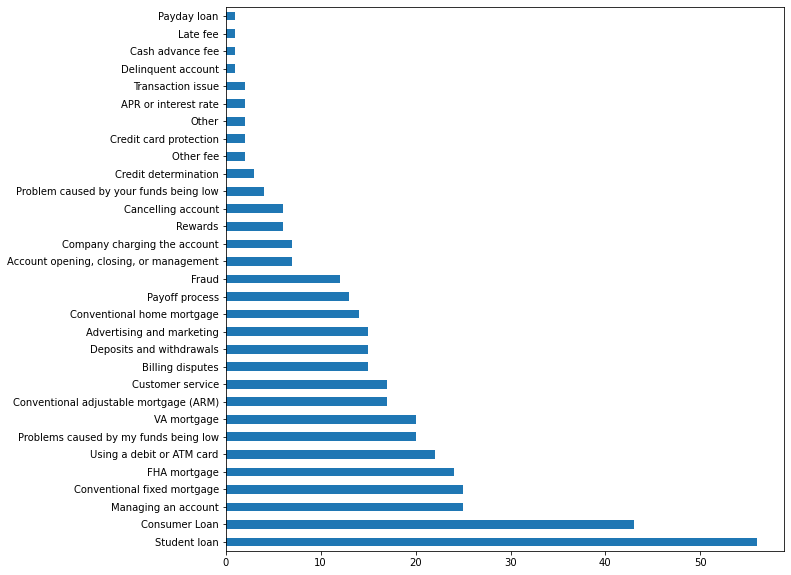

In [26]:
complaints['complaint_text'].value_counts().plot(kind='barh',figsize=(10,10))

Student_loan is where most of our categories are falling into.


It seems that student and consumer loan is where about 25% of our tickets are coming from  

---

## Task 3
### Check if there are any encoding issues (try to read the data using open() and see if you need to use any special text encoding options, other than utf-8)

In [27]:
f = open("../data/ticket_classification/complaints.json", "r")
print(f.read())

{
    "data": [
        {
            "text": "I recently opened a Citibank CitiGold Checking Account that was advertised to have a signup bonus of   AAdvantage points upon the completion of two consecutive bill payments and {$1000.00} in debit card purchases. After signing up with the intent to complete these requirements a Citibank representative confirmed that the offer applied to my new account and that I should complete the offer requirements. This confirmation was communicated via their online secure message feature, and I have attached a copy for reference. Once I completed the requirements as directed I inquired about the expected delivery date of the earned bonus via secure message and I was told that my account was not targeted and that I would not receive the bonus as promised. This conflicts with what I was previously told and I have already spent a considerable amount of time to meet the requirements as directed. ",
            "complaint_id": "bc_5"
        },
        {
 

In [28]:
# Making sure that it is in utf-8
import codecs

# ------------------------------------------------------------------------------------------------------- #
try:
    f = codecs.open('../data/ticket_classification/complaints.json', encoding='utf-8', errors='strict')
    for line in f:
        pass
    print("Valid utf-8")
except UnicodeDecodeError:
    print("invalid utf-8")
    
# ------------------------------------------------------------------------------------------------------- #
try:
    f = codecs.open('../data/ticket_classification/mappings.json', encoding='utf-8', errors='strict')
    for line in f:
        pass
    print("Valid utf-8")
except UnicodeDecodeError:
    print("invalid utf-8")

# ------------------------------------------------------------------------------------------------------- #
try:
    f = codecs.open('../data/ticket_classification/respondent.csv', encoding='utf-8', errors='strict')
    for line in f:
        pass
    print("Valid utf-8")
except UnicodeDecodeError:
    print("invalid utf-8")
# --------------------------------------------- END ---------------------------------------------------- #

Valid utf-8
Valid utf-8
Valid utf-8


Checked all 3 files, for utf-8 encoding and any erorrs.

## Task 4
### Create a report that identifies how much of each complaint is composed of commonly used english stopwords.

### Firstly, let's count the number of words in our string

In [29]:
# For calculating the total number of words, we will need to split the string data into 'words'. To do this we can :-
# 1. Use regex and split on spaces 
# 2. Use a library to do the complex regex part for us, here i am going to use a library called 'nltk'

# Counting words

# The regex approach
# ------------------------------------------------------------------------------------------------------------------------ #
# import regex module
import re

# initialize string
temp = "I have been one to always stay on top of my debts. I have an auto loan with Nissan that I have never been late on. I paid my account via phone during the month, when I called I was advised that I had fallen 30 days late. I stated to Nissan that I was aware that my payment was made on the   day. However, I was told that since the payment would n't post until the next business day I was in fact 30 days late. I explained to the rep, I even spoke to two supervisors who advised me that there was nothing that I can do. I explained that I was a   Vet and that I was juggling two households because I take care of my father under  . I even wrote them a letter pleading my case. That I did n't intend to fall behind, I just let the date get beyond me. This is affecting my credit and my employment because I need a security clearance to perform my job. I am in jeopardy of loosing my job if I do n't get this late pay removed from my credit."
# using regex findall()
result = len(re.findall(r'\w+', temp))
result
# ------------------------------------------------------------------------------------------------------------------------ #
# The library approach 
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
no_punc_count = tokenizer.tokenize(temp)

# ------------------------------------------------------------------------------------------------------------------------ #

In [30]:
# Output of regex approach
result

197

In [31]:
# Output of using library approach
len(no_punc_count)

197

So for our string stored in temp. we have a total of 197 **words**

In [32]:
# Writing a function to do the same

# Library approach
# def counting_words(x):
#     tokenizer = RegexpTokenizer(r'\w+')
#     no_punc_words = tokenizer.tokenize(x)
#     no_punc_count = len(no_punc_words)
#     return no_punc_count

# Regex approach
def counting_words(x):
    # using regex findall()
    result = len(re.findall(r'\w+', x))
    return result

In [33]:
counting_words(temp)

197

In [34]:
# Applying the same to our dataframe
complaints['text'].apply(counting_words)

0      147
1      135
2      169
3      189
4      112
      ... 
395     33
396    104
397     78
398    147
399    156
Name: text, Length: 400, dtype: int64

In [35]:
# Saving the output in a new column
complaints['no_of_words'] = complaints['text'].apply(counting_words)

In [36]:
complaints.head(7)

,text,complaint_id,complaint_text,no_of_words
0,I recently opened a Citibank CitiGold Checking...,bc_5,Managing an account,147
1,I went into Capital One bank to open a checkin...,bc_3,"Account opening, closing, or management",135
2,I try using my chase card at a bakery departme...,bc_2,Using a debit or ATM card,169
3,Approximately a half hour ago I visited a US B...,bc_2,Using a debit or ATM card,189
4,I have made a transaction using Chase quickpay...,bc_6,Company charging the account,112
5,I had recently received a check for a settleme...,bc_0,Problems caused by my funds being low,16
6,I was charged bank fees when I should have onl...,bc_0,Problems caused by my funds being low,196


### Stop word part

In [37]:
# First of all figure our stop word part
import nltk
from nltk.corpus import stopwords
# These are our stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [38]:
complaints['text']

0      I recently opened a Citibank CitiGold Checking...
1      I went into Capital One bank to open a checkin...
2      I try using my chase card at a bakery departme...
3      Approximately a half hour ago I visited a US B...
4      I have made a transaction using Chase quickpay...
                             ...                        
395    I am struggling to get the debt relief I am en...
396    I turn in the car in 2010 as a voluntary repos...
397    We set up payment for interest payment only fo...
398    This regards a car loan financed by First Hawa...
399    Checked into a loan at ONE MAIN FINANCIAL neve...
Name: text, Length: 400, dtype: object

### Logic for doing this
So, there are 2 things i need to check, firstly if there are stopwords in the text and if they are then how many.

I should write a function that does check for number of stopwords in a string and then run that function on the whole df with the apply function.

In [39]:
# Running my logic on a single instance, and then will write a function that does the same thing.
# Thinking about the logic
temp = "I have been one to always stay on top of my debts. I have an auto loan with Nissan that I have never been late on. I paid my account via phone during the month, when I called I was advised that I had fallen 30 days late. I stated to Nissan that I was aware that my payment was made on the   day. However, I was told that since the payment would n't post until the next business day I was in fact 30 days late. I explained to the rep, I even spoke to two supervisors who advised me that there was nothing that I can do. I explained that I was a   Vet and that I was juggling two households because I take care of my father under  . I even wrote them a letter pleading my case. That I did n't intend to fall behind, I just let the date get beyond me. This is affecting my credit and my employment because I need a security clearance to perform my job. I am in jeopardy of loosing my job if I do n't get this late pay removed from my credit."

In [40]:
# These are my stopwords
for i in stopwords.words('english'):
    print(i)

i
me
my
myself
we
our
ours
ourselves
you
you're
you've
you'll
you'd
your
yours
yourself
yourselves
he
him
his
himself
she
she's
her
hers
herself
it
it's
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
that'll
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
don't
should
should've
now
d
ll
m
o
re
ve
y
ain
aren
aren't
couldn
couldn't
didn
didn't
doesn
doesn't
hadn
hadn't
hasn
hasn't
haven
haven't
isn
isn't
ma
mightn
mightn't
mustn
mustn't
needn
needn't
shan
shan't
shouldn
shouldn't
wasn
wasn't
weren
weren't
won
won't
wouldn
wouldn't


In [41]:
# Approach 1 
# Here i am checking that i can apply a if-else condition to check whether 'have' is there in 'i have a dream'.
if 'have' in 'i have a dream':
    print('Works')
else:
    print('Something is wrong')


Works


In [42]:
# Approach 2 
# We already have the words counted and seperated, we can check if we have our stopwords in them 
if 'have' in re.findall(r'\w+', temp):
    print('Works')
else:
    print('Something is wrong')  
# result = len(re.findall(r'\w+', x))

Works


In [43]:
# Alright, so that works
# So going by that logic, i can do this in a loop and count 1 more everytime i see another stopword. Something like this.
count = 0
words = re.findall(r'\w+', temp)
for i in stopwords.words('english'):
    if i in words:
        count += 1

In [44]:
# Looking at the result
count

34

Alright, so for the sentence in temp, there are 34 stopwords. **But wait**.

Our method is prone to **Case-sensitive** words, we need to lower all the strings to catch all the cases

In [45]:
count = 0
words = re.findall(r'\w+', temp.lower())
for i in stopwords.words('english'):
    if i in words:
        count += 1

In [46]:
# Looking at the result
count

35

So now we have 35 stop words, if we did not convert everything to lower, we might have missed out on some stopwords.

So, now we are ready to wrap this logic inside a function so that we can apply it to a dataframe row by row.

In [47]:
# Writing the function
def count_stopwords(x):
    # X here is going to be a string

    # Converting it to lower
    x= x.lower()
    
    # Initialising count
    count = 0
    
    # Converting it to a list of words
    words = re.findall(r'\w+', x)
    
    # Running the loop to check how many stopwords
    for i in stopwords.words('english'):
        if i in words:
            count += 1

    return count

In [48]:
# Applying that function and saving the result in a new column
complaints['no_of_stopwords'] = complaints['text'].apply(count_stopwords)

In [49]:
complaints.head(10)

,text,complaint_id,complaint_text,no_of_words,no_of_stopwords
0,I recently opened a Citibank CitiGold Checking...,bc_5,Managing an account,147,24
1,I went into Capital One bank to open a checkin...,bc_3,"Account opening, closing, or management",135,32
2,I try using my chase card at a bakery departme...,bc_2,Using a debit or ATM card,169,32
3,Approximately a half hour ago I visited a US B...,bc_2,Using a debit or ATM card,189,38
4,I have made a transaction using Chase quickpay...,bc_6,Company charging the account,112,28
5,I had recently received a check for a settleme...,bc_0,Problems caused by my funds being low,16,6
6,I was charged bank fees when I should have onl...,bc_0,Problems caused by my funds being low,196,42
7,I tried to get a credit card with huntington. ...,bc_5,Managing an account,145,37
8,I transferred money out of a joint account wi...,bc_5,Managing an account,177,42
9,I have been charged over {$1400.00} by bank of...,bc_0,Problems caused by my funds being low,185,41


<AxesSubplot:>

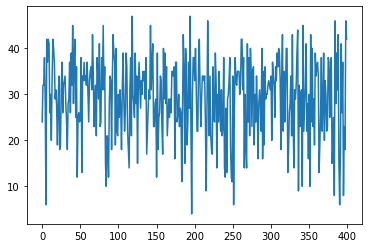

In [50]:
complaints['no_of_stopwords'].plot()

#### Now to calculate the percentage of stopwords compared to the number of words

#### Calculating percentage

In [51]:
# Calculating percentage with 2 columns.
(complaints['no_of_stopwords']/complaints['no_of_words']) * 100

0      16.326531
1      23.703704
2      18.934911
3      20.105820
4      25.000000
         ...    
395    24.242424
396    22.115385
397    23.076923
398    31.292517
399    26.923077
Length: 400, dtype: float64

In [52]:
# Assigning that column to a new column
complaints['stopwords_to_word_percentage'] = (complaints['no_of_stopwords']/complaints['no_of_words']) * 100

In [53]:
complaints.head()

,text,complaint_id,complaint_text,no_of_words,no_of_stopwords,stopwords_to_word_percentage
0,I recently opened a Citibank CitiGold Checking...,bc_5,Managing an account,147,24,16.326531
1,I went into Capital One bank to open a checkin...,bc_3,"Account opening, closing, or management",135,32,23.703704
2,I try using my chase card at a bakery departme...,bc_2,Using a debit or ATM card,169,32,18.934911
3,Approximately a half hour ago I visited a US B...,bc_2,Using a debit or ATM card,189,38,20.105820
4,I have made a transaction using Chase quickpay...,bc_6,Company charging the account,112,28,25.000000


<AxesSubplot:>

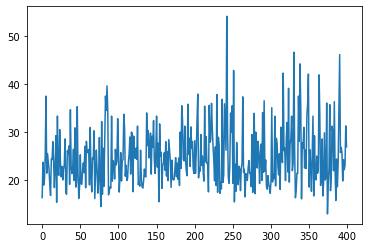

In [54]:
complaints['stopwords_to_word_percentage'].plot()

So, mostly we have about 30% of our words are stopwords. A better way to gather insights from this would be to plot a binned histogram

(array([  0.,   2.,  90., 141.,  90.,  45.,  24.,   5.,   2.]),
 array([ 0, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
 <BarContainer object of 9 artists>)

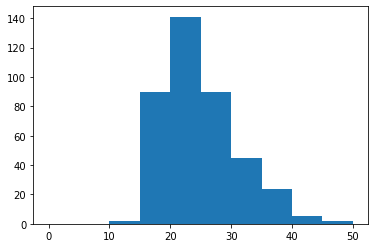

In [55]:
import matplotlib.pyplot as plt
plt.hist(complaints['stopwords_to_word_percentage'],bins=[0,10,15,20,25,30,35,40,45,50])

We can see that most our complaines consisted of 15-35% of stopwords

## Text Cleaning
We are going to do a couple of things to clean our text data here.
1. Lower Casing
2. Removal of Punctuations
3. Removing Stopwords
4. Lemmatization

### 1. Lower Casing

In [56]:
complaints["text_lower"] = complaints["text"].str.lower()

In [57]:
complaints.head()

,text,complaint_id,complaint_text,no_of_words,no_of_stopwords,stopwords_to_word_percentage,text_lower
0,I recently opened a Citibank CitiGold Checking...,bc_5,Managing an account,147,24,16.326531,i recently opened a citibank citigold checking...
1,I went into Capital One bank to open a checkin...,bc_3,"Account opening, closing, or management",135,32,23.703704,i went into capital one bank to open a checkin...
2,I try using my chase card at a bakery departme...,bc_2,Using a debit or ATM card,169,32,18.934911,i try using my chase card at a bakery departme...
3,Approximately a half hour ago I visited a US B...,bc_2,Using a debit or ATM card,189,38,20.105820,approximately a half hour ago i visited a us b...
4,I have made a transaction using Chase quickpay...,bc_6,Company charging the account,112,28,25.000000,i have made a transaction using chase quickpay...


### 2. Removal of Punctuations

In [58]:
import string

# The punctuation that we want to remove 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
#defining the function to remove punctuation
def clean_special_char(text):
    clean_text="".join([i for i in text if i not in string.punctuation])
    return clean_text

In [60]:
#storing the puntuation free text
complaints["clean_text"] = complaints["text_lower"].apply(clean_special_char)

In [61]:
complaints.head()

,text,complaint_id,complaint_text,no_of_words,no_of_stopwords,stopwords_to_word_percentage,text_lower,clean_text
0,I recently opened a Citibank CitiGold Checking...,bc_5,Managing an account,147,24,16.326531,i recently opened a citibank citigold checking...,i recently opened a citibank citigold checking...
1,I went into Capital One bank to open a checkin...,bc_3,"Account opening, closing, or management",135,32,23.703704,i went into capital one bank to open a checkin...,i went into capital one bank to open a checkin...
2,I try using my chase card at a bakery departme...,bc_2,Using a debit or ATM card,169,32,18.934911,i try using my chase card at a bakery departme...,i try using my chase card at a bakery departme...
3,Approximately a half hour ago I visited a US B...,bc_2,Using a debit or ATM card,189,38,20.105820,approximately a half hour ago i visited a us b...,approximately a half hour ago i visited a us b...
4,I have made a transaction using Chase quickpay...,bc_6,Company charging the account,112,28,25.000000,i have made a transaction using chase quickpay...,i have made a transaction using chase quickpay...


### 3. Removing Stop words

In [62]:
from nltk.corpus import stopwords
# These are our stopwords
stopwords = stopwords.words('english')

In [63]:
def remove_stopwords(text):
    text_list = text.split(' ')
    clean_list = [i for i in text_list if i not in stopwords]
    clean = ' '.join(clean_list)
    return clean

In [64]:
# Applying the function to clean our data of stopwords
complaints["clean_text"].apply(remove_stopwords)

0      recently opened citibank citigold checking acc...
1      went capital one bank open checking account si...
2      try using chase card bakery department x ga ch...
3      approximately half hour ago visited us bank at...
4      made transaction using chase quickpay sent mon...
                             ...                        
395    struggling get debt relief entitled private lo...
396    turn car 2010 voluntary repossession licensed ...
397    set payment interest payment one loan paid eve...
398    regards car loan financed first hawaiian bank ...
399    checked loan one main financial never got inqu...
Name: clean_text, Length: 400, dtype: object

In [65]:
# Assigning the result to a column
complaints["clean_text_stop_words"] = complaints["clean_text"].apply(remove_stopwords)

In [66]:
complaints.head()

,text,complaint_id,complaint_text,no_of_words,no_of_stopwords,stopwords_to_word_percentage,text_lower,clean_text,clean_text_stop_words
0,I recently opened a Citibank CitiGold Checking...,bc_5,Managing an account,147,24,16.326531,i recently opened a citibank citigold checking...,i recently opened a citibank citigold checking...,recently opened citibank citigold checking acc...
1,I went into Capital One bank to open a checkin...,bc_3,"Account opening, closing, or management",135,32,23.703704,i went into capital one bank to open a checkin...,i went into capital one bank to open a checkin...,went capital one bank open checking account si...
2,I try using my chase card at a bakery departme...,bc_2,Using a debit or ATM card,169,32,18.934911,i try using my chase card at a bakery departme...,i try using my chase card at a bakery departme...,try using chase card bakery department x ga ch...
3,Approximately a half hour ago I visited a US B...,bc_2,Using a debit or ATM card,189,38,20.105820,approximately a half hour ago i visited a us b...,approximately a half hour ago i visited a us b...,approximately half hour ago visited us bank at...
4,I have made a transaction using Chase quickpay...,bc_6,Company charging the account,112,28,25.000000,i have made a transaction using chase quickpay...,i have made a transaction using chase quickpay...,made transaction using chase quickpay sent mon...


### 4. Lemmatization

In [67]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [68]:
# Showcasing the lemmatizer
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

rocks : rock
corpora : corpus


In [69]:
def lemmatizer(text):
    lemmatizer = WordNetLemmatizer()
    lemmatize_text = lemmatizer.lemmatize(text)
    return lemmatize_text

In [70]:
# Applying the function to our data 
complaints["clean_text_stop_words"].apply(lemmatizer)

0      recently opened citibank citigold checking acc...
1      went capital one bank open checking account si...
2      try using chase card bakery department x ga ch...
3      approximately half hour ago visited us bank at...
4      made transaction using chase quickpay sent mon...
                             ...                        
395    struggling get debt relief entitled private lo...
396    turn car 2010 voluntary repossession licensed ...
397    set payment interest payment one loan paid eve...
398    regards car loan financed first hawaiian bank ...
399    checked loan one main financial never got inqu...
Name: clean_text_stop_words, Length: 400, dtype: object

In [71]:
complaints["clean_text_stop_words_lemmatize"] = complaints["clean_text_stop_words"].apply(lemmatizer)

In [72]:
complaints.head()

,text,complaint_id,complaint_text,no_of_words,no_of_stopwords,stopwords_to_word_percentage,text_lower,clean_text,clean_text_stop_words,clean_text_stop_words_lemmatize
0,I recently opened a Citibank CitiGold Checking...,bc_5,Managing an account,147,24,16.326531,i recently opened a citibank citigold checking...,i recently opened a citibank citigold checking...,recently opened citibank citigold checking acc...,recently opened citibank citigold checking acc...
1,I went into Capital One bank to open a checkin...,bc_3,"Account opening, closing, or management",135,32,23.703704,i went into capital one bank to open a checkin...,i went into capital one bank to open a checkin...,went capital one bank open checking account si...,went capital one bank open checking account si...
2,I try using my chase card at a bakery departme...,bc_2,Using a debit or ATM card,169,32,18.934911,i try using my chase card at a bakery departme...,i try using my chase card at a bakery departme...,try using chase card bakery department x ga ch...,try using chase card bakery department x ga ch...
3,Approximately a half hour ago I visited a US B...,bc_2,Using a debit or ATM card,189,38,20.105820,approximately a half hour ago i visited a us b...,approximately a half hour ago i visited a us b...,approximately half hour ago visited us bank at...,approximately half hour ago visited us bank at...
4,I have made a transaction using Chase quickpay...,bc_6,Company charging the account,112,28,25.000000,i have made a transaction using chase quickpay...,i have made a transaction using chase quickpay...,made transaction using chase quickpay sent mon...,made transaction using chase quickpay sent mon...


#### Till here, we have perfomed all of the steps mentioned above, and i have not removed any column. 
- The reason i have not removed any column is so that you can see the changes we have made to our data over the different steps we took to get here 

In [73]:
complaints.isna().sum()

text                               0
complaint_id                       0
complaint_text                     0
no_of_words                        0
no_of_stopwords                    0
stopwords_to_word_percentage       0
text_lower                         0
clean_text                         0
clean_text_stop_words              0
clean_text_stop_words_lemmatize    0
dtype: int64

### Visualising the data 

In [74]:
import os
from wordcloud import WordCloud
from PIL import Image

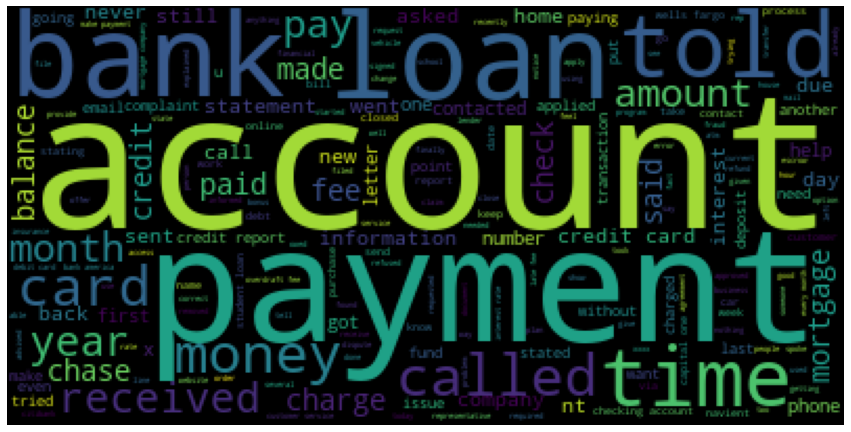

In [75]:
# comment_mask = np.array(Image.open("comment.png"))
#create and generate a word cloud image
# wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(complaints['clean_text_stop_words_lemmatize'])
wordcloud2 = WordCloud().generate(' '.join(complaints['clean_text_stop_words_lemmatize']))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

### Saving the data

In [76]:
# Let's save this csv and load it for the next part of our solution
# complaints.to_csv('complaints.csv')

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<h1><p style="text-align: center;"> Next Part </p></h1>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

# Tasks:
## Feature Engineering
- Create a count matrix or a tfidf matrix
- Can you think of adding any other features apart from count matrix or tfidf matrix?
- If you are comfortable working with word-embeddings then create features based on pre-trained word vectors or features out of a BERT model (optional)

In [77]:
# import pandas as pd
# df = pd.read_csv('complaints.csv')
# df.head()

In [78]:
complaints.head()

,text,complaint_id,complaint_text,no_of_words,no_of_stopwords,stopwords_to_word_percentage,text_lower,clean_text,clean_text_stop_words,clean_text_stop_words_lemmatize
0,I recently opened a Citibank CitiGold Checking...,bc_5,Managing an account,147,24,16.326531,i recently opened a citibank citigold checking...,i recently opened a citibank citigold checking...,recently opened citibank citigold checking acc...,recently opened citibank citigold checking acc...
1,I went into Capital One bank to open a checkin...,bc_3,"Account opening, closing, or management",135,32,23.703704,i went into capital one bank to open a checkin...,i went into capital one bank to open a checkin...,went capital one bank open checking account si...,went capital one bank open checking account si...
2,I try using my chase card at a bakery departme...,bc_2,Using a debit or ATM card,169,32,18.934911,i try using my chase card at a bakery departme...,i try using my chase card at a bakery departme...,try using chase card bakery department x ga ch...,try using chase card bakery department x ga ch...
3,Approximately a half hour ago I visited a US B...,bc_2,Using a debit or ATM card,189,38,20.105820,approximately a half hour ago i visited a us b...,approximately a half hour ago i visited a us b...,approximately half hour ago visited us bank at...,approximately half hour ago visited us bank at...
4,I have made a transaction using Chase quickpay...,bc_6,Company charging the account,112,28,25.000000,i have made a transaction using chase quickpay...,i have made a transaction using chase quickpay...,made transaction using chase quickpay sent mon...,made transaction using chase quickpay sent mon...


In [79]:
# Alright, now i am going to drop the columns that we don't need anymore
df = complaints.drop(['text','complaint_text','no_of_words','no_of_stopwords','stopwords_to_word_percentage','text_lower','clean_text','clean_text_stop_words'],axis=1)

In [80]:
df.head()

,complaint_id,clean_text_stop_words_lemmatize
0,bc_5,recently opened citibank citigold checking acc...
1,bc_3,went capital one bank open checking account si...
2,bc_2,try using chase card bakery department x ga ch...
3,bc_2,approximately half hour ago visited us bank at...
4,bc_6,made transaction using chase quickpay sent mon...


Here, we are only going to use the clean data, so i am dropping the other columns

In [81]:
df.isna().sum()

complaint_id                       0
clean_text_stop_words_lemmatize    0
dtype: int64

### Converting the target variable to numbers/labels

In [82]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels_encoder = le.fit(complaints['complaint_id'])
labels = labels_encoder.fit_transform(complaints['complaint_id'])
labels

array([ 5,  3,  2,  2,  6,  0,  0,  5,  5,  0,  6,  2,  4,  2,  5,  2,  2,
        0,  6,  2,  5,  2,  4,  4,  2,  6,  2,  4,  5,  2,  5,  0,  6,  5,
        1,  0,  0,  5,  5,  4,  5,  5,  4,  5,  2,  2,  0,  3,  5,  5,  2,
        2,  2,  2,  0,  3,  4,  0,  0,  0,  5,  5,  3,  2,  0,  5,  5,  1,
        6,  5,  2,  4,  0,  2,  5,  4,  4,  6,  4,  0,  0,  1,  4,  5,  1,
        2,  3,  2,  3,  5,  0,  3,  5,  0,  0,  4,  5,  4,  4,  0, 30, 29,
       30, 27, 26, 27, 28, 28, 26, 29, 27, 27, 28, 26, 29, 28, 30, 26, 30,
       27, 27, 27, 29, 30, 30, 27, 27, 29, 30, 26, 30, 29, 27, 28, 30, 27,
       27, 29, 26, 29, 29, 29, 29, 27, 29, 26, 30, 30, 26, 26, 27, 30, 27,
       30, 26, 27, 29, 28, 29, 28, 26, 29, 26, 28, 27, 29, 27, 26, 28, 29,
       30, 26, 30, 27, 26, 27, 28, 27, 27, 29, 29, 30, 29, 26, 29, 30, 26,
       27, 29, 30, 30, 28, 29, 28, 28, 30, 28, 29, 27, 27, 12, 21, 21, 21,
        7, 14,  7, 17, 14,  7,  7, 17,  7,  7, 15, 21,  7,  9, 21,  7, 12,
       10, 12,  8, 12, 12

In [83]:
df['labels'] = labels

In [84]:
df.head()

,complaint_id,clean_text_stop_words_lemmatize,labels
0,bc_5,recently opened citibank citigold checking acc...,5
1,bc_3,went capital one bank open checking account si...,3
2,bc_2,try using chase card bakery department x ga ch...,2
3,bc_2,approximately half hour ago visited us bank at...,2
4,bc_6,made transaction using chase quickpay sent mon...,6


### Train test spit

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['clean_text_stop_words_lemmatize'], df['labels'], test_size = 0.3, random_state = 1234)

## Converting text to meaningful numbers.
We are going to try basic approaches like
1. Count vectorizer
2. Tf-idf vectorizer

You can also go for advanced approaches with
1. Glove
2. Word2vec
3. Bert Embeddings

### Count vectorizer

In [86]:
from sklearn.feature_extraction.text import CountVectorizer 
lst = x_train.tolist()
cnt_vectorizer = CountVectorizer(input=lst)
features_train_transformed = cnt_vectorizer.fit_transform(lst) #gives count vector for x_train
features_test_transformed  = cnt_vectorizer.transform(x_test) #gives count vector for x_test

In [87]:
features_train_transformed

<280x3172 sparse matrix of type '<class 'numpy.int64'>'
	with 12660 stored elements in Compressed Sparse Row format>

In [88]:
features_test_transformed

<120x3172 sparse matrix of type '<class 'numpy.int64'>'
	with 4960 stored elements in Compressed Sparse Row format>

### TF-IDF vectorizer

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer 
lst = x_train.tolist()
tf_vectorizer = TfidfVectorizer(input=lst)
tf_features_train_transformed = tf_vectorizer.fit_transform(lst) #gives tf idf vector for x_train
tf_features_test_transformed  = tf_vectorizer.transform(x_test) #gives tf idf vector for x_test

In [90]:
tf_features_train_transformed

<280x3172 sparse matrix of type '<class 'numpy.float64'>'
	with 12660 stored elements in Compressed Sparse Row format>

In [91]:
tf_features_test_transformed

<120x3172 sparse matrix of type '<class 'numpy.float64'>'
	with 4960 stored elements in Compressed Sparse Row format>

### Loading Glove model

In [92]:
import numpy as np

# Function to load the glove model
def load_glove_model(File):
    print("Loading Glove Model")
    glove_model = {}
    with open(File,'r') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = embedding
    print(f"{len(glove_model)} words loaded!")
    return glove_model

In [94]:
glove_model = load_glove_model('./model_deployment/models/glove.6B/glove.6B.100d.txt')

Loading Glove Model
400000 words loaded!


Once our model is loaded, it will give us a vector of size 100 per word. 
- So for a particular sentence, we will get multiple vectors
- We will aggregate these vectors into a **single** vector per **sentence**

In [95]:
glove_model['hello']

array([ 0.26688  ,  0.39632  ,  0.6169   , -0.77451  , -0.1039   ,
        0.26697  ,  0.2788   ,  0.30992  ,  0.0054685, -0.085256 ,
        0.73602  , -0.098432 ,  0.5479   , -0.030305 ,  0.33479  ,
        0.14094  , -0.0070003,  0.32569  ,  0.22902  ,  0.46557  ,
       -0.19531  ,  0.37491  , -0.7139   , -0.51775  ,  0.77039  ,
        1.0881   , -0.66011  , -0.16234  ,  0.9119   ,  0.21046  ,
        0.047494 ,  1.0019   ,  1.1133   ,  0.70094  , -0.08696  ,
        0.47571  ,  0.1636   , -0.44469  ,  0.4469   , -0.93817  ,
        0.013101 ,  0.085964 , -0.67456  ,  0.49662  , -0.037827 ,
       -0.11038  , -0.28612  ,  0.074606 , -0.31527  , -0.093774 ,
       -0.57069  ,  0.66865  ,  0.45307  , -0.34154  , -0.7166   ,
       -0.75273  ,  0.075212 ,  0.57903  , -0.1191   , -0.11379  ,
       -0.10026  ,  0.71341  , -1.1574   , -0.74026  ,  0.40452  ,
        0.18023  ,  0.21449  ,  0.37638  ,  0.11239  , -0.53639  ,
       -0.025092 ,  0.31886  , -0.25013  , -0.63283  , -0.0118

We can now use this to get 100 dimensional vectors for every word.

----

A demo

In [96]:
dummy_text = 'My name is ram'

In [97]:
vectors = []
text_list = dummy_text.split(' ')
for i in text_list:
    try:
        vectors.append(glove_model[str(i)])
    except:
        pass

In [98]:
vectors

[array([ 1.1326e-01, -2.3055e-01,  4.6840e-01, -2.6068e-01,  1.2871e-01,
         3.8373e-01, -3.2314e-02, -5.7986e-01,  1.8424e-01,  4.6796e-02,
        -5.5893e-01,  2.7794e-01,  7.4838e-01,  3.3575e-01,  2.6834e-02,
        -4.4505e-01,  1.4755e+00, -1.4081e-01, -3.1658e-01,  5.7686e-01,
        -1.8440e-01, -1.0370e-01, -2.2519e-01,  3.4614e-01, -2.1930e-01,
        -2.3868e-01, -1.2845e-01, -7.7772e-01,  1.6957e-01,  2.9432e-02,
         4.7705e-01,  8.5881e-01, -5.3617e-02,  1.0770e-01,  9.6440e-02,
         2.7325e-01,  4.4933e-02,  1.3310e-03,  5.0395e-02, -4.8147e-01,
         1.7561e-01,  1.9419e-01,  5.1495e-01, -5.6149e-01,  1.1211e-01,
         2.5591e-01,  2.9011e-02, -3.4461e-03, -1.8478e-01, -2.0650e-01,
         1.0358e-01,  7.5532e-01,  9.4688e-01,  8.4278e-01, -7.0051e-01,
        -2.4433e+00, -9.1913e-01, -1.0451e-01,  9.0954e-01,  2.5491e-01,
         2.1129e-01,  1.2046e+00, -9.1615e-02,  3.0364e-01,  1.3768e+00,
        -5.8152e-01,  3.8085e-01,  1.5504e-01,  2.0

Now, we have a list of vectors. 
    
This list contains one vector per word in our sentece

#### Averaging the list of vectors

In [99]:
import numpy as np
np_vectors = np.array(vectors)

In [100]:
np_vectors_single = np_vectors.mean(axis=0)

In [101]:
np_vectors_single.tolist()

[-0.7683266666666667,
 -0.07464666666666667,
 0.42072666666666664,
 -0.4001766666666667,
 0.2388866666666667,
 -0.01694333333333331,
 -0.3080293333333333,
 0.17358666666666664,
 0.146412,
 0.034232000000000005,
 -0.035073333333333324,
 0.24674,
 0.19505666666666666,
 0.25607,
 0.029252666666666666,
 -0.263316,
 0.73292,
 0.17442366666666664,
 -0.3485466666666667,
 0.8480433333333334,
 -0.029306666666666665,
 -0.29288333333333333,
 0.04915,
 0.45576333333333335,
 0.12385666666666667,
 0.12312333333333335,
 -0.10351233333333333,
 -0.54067,
 0.10662999999999996,
 0.21116533333333332,
 0.04307333333333333,
 0.73287,
 -0.15847233333333335,
 0.19463,
 0.29005,
 0.0117266666666667,
 0.05714766666666667,
 0.23987366666666668,
 0.47211166666666665,
 -0.44903333333333334,
 0.05245666666666665,
 -0.03929666666666667,
 0.6319,
 -0.28082333333333337,
 -0.015753333333333324,
 -0.11125666666666666,
 0.5770036666666667,
 -0.07186503333333334,
 -0.12091400000000001,
 -0.010406666666666639,
 -0.15776400

This is the average of all the vectors in the list. We can now use this vector to train our model on.

----

### Building our dataset 

In [102]:
# Writing a function that returns a vector of size 100 for a sentence
def return_glove_vector(text):
    vectors = []
    text_list = text.split(' ')
    for i in text_list:
        try:
            vectors.append(glove_model[str(i)])
        except:
            pass
        
    np_vectors = np.array(vectors)
    np_vectors_single = np_vectors.mean(axis=0)
    np_vectors_single = np_vectors_single.tolist()
    return np_vectors_single

In [103]:
glove_features_train_transformed =  x_train.apply(return_glove_vector) #gives glove vector for x_train
glove_features_test_transformed  =  x_test.apply(return_glove_vector) #gives glove vector for x_test

In [104]:
glove_features_train_transformed = glove_features_train_transformed.to_list()
glove_features_test_transformed = glove_features_test_transformed.to_list()

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<h1><p style="text-align: center;"> Next Part </p></h1>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

# Tasks:
## Modelling:
- What models can you use to create a ticket classification system?
- Try atleast one supervised learning approach (Naive Bayes, Linear Classifier, SVM, Tree based ensembles)
- Can you implement a knn here?
- Try deep learning based techniques such as rnn, lstm and bert (optional)
- Will an unsupervised technique such as clustering work here?
- Report the recall and precision for each class of complaint in the data that your finalized model is able to achieve

# Training models on count vectors

### MultinomialNB

In [105]:
from sklearn.naive_bayes import MultinomialNB
# train the model
clf = MultinomialNB()
clf.fit(features_train_transformed, y_train)
score = clf.score(features_test_transformed, y_test)
clf.score(features_test_transformed, y_test)

0.35

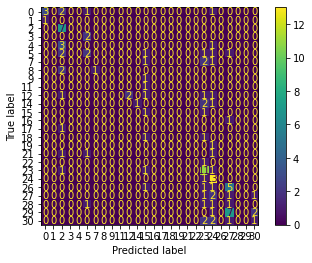

<Figure size 1080x1080 with 0 Axes>

In [106]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,features_test_transformed, y_test)  
plt.figure(figsize=(15, 15))
plt.show()

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test,clf.predict(features_test_transformed)))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.00      0.00      0.00         1
           2       0.35      1.00      0.52         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.29      0.25      0.27         8
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       1.00      0.33      0.50         6
          14       1.00      0.25      0.40         4
          15       0.11      0.50      0.18         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          21       0.00    

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
# Making a score dataframe
df_score = pd.DataFrame({"MultinomialNB":[score]})
df_score

,MultinomialNB
0,0.35


### Logistic regression

In [109]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=12345).fit(features_train_transformed, y_train)
score = clf.score(features_test_transformed, y_test)
clf.score(features_test_transformed, y_test)

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3416666666666667

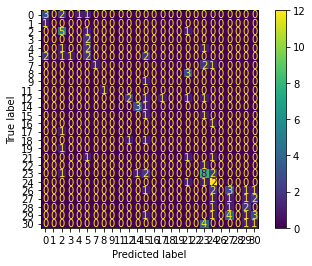

<Figure size 1080x1080 with 0 Axes>

In [110]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,features_test_transformed, y_test)  
plt.figure(figsize=(15, 15))
plt.show()

In [111]:
print(classification_report(y_test,clf.predict(features_test_transformed)))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.00      0.00      0.00         1
           2       0.42      0.71      0.53         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.22      0.25      0.24         8
           7       1.00      0.25      0.40         4
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.67      0.33      0.44         6
          14       0.75      0.75      0.75         4
          15       0.09      0.50      0.15         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          21       0.14    

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
# Adding to the Dataframe for scores
df_score["Logistic regression"] = [score]
df_score

,MultinomialNB,Logistic regression
0,0.35,0.341667


### Decision tree

In [113]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1234).fit(features_train_transformed, y_train)
score = clf.score(features_test_transformed, y_test)
clf.score(features_test_transformed, y_test)

0.225

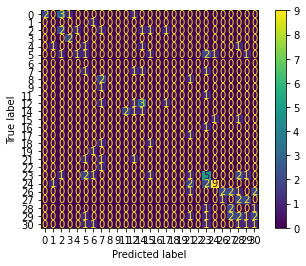

<Figure size 1080x1080 with 0 Axes>

In [114]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,features_test_transformed, y_test)  
plt.figure(figsize=(15, 15))
plt.show()

In [115]:
print(classification_report(y_test,clf.predict(features_test_transformed)))

              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.00      0.00      0.00         1
           2       0.29      0.29      0.29         7
           3       0.67      1.00      0.80         2
           4       0.00      0.00      0.00         4
           5       0.12      0.12      0.12         8
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.20      0.17      0.18         6
          14       0.14      0.25      0.18         4
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00    

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/pyth

In [116]:
# Adding to the Dataframe for scores
df_score["Decision tree"] = [score]
df_score

,MultinomialNB,Logistic regression,Decision tree
0,0.35,0.341667,0.225


### Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=1234).fit(features_train_transformed, y_train)
score = clf.score(features_test_transformed, y_test)
clf.score(features_test_transformed, y_test)

0.13333333333333333

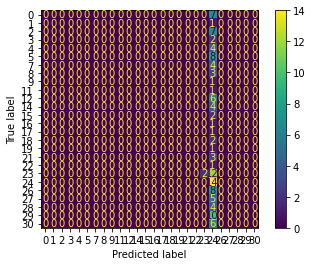

<Figure size 1080x1080 with 0 Axes>

In [118]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,features_test_transformed, y_test)  
plt.figure(figsize=(15, 15))
plt.show()

In [119]:
print(classification_report(y_test,clf.predict(features_test_transformed)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          21       0.00    

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
# Adding to the Dataframe for scores
df_score["Random Forest"] = [score]
df_score

,MultinomialNB,Logistic regression,Decision tree,Random Forest
0,0.35,0.341667,0.225,0.133333


### SVM Classifier

In [121]:
from sklearn.svm import SVC
clf = SVC(gamma='auto').fit(features_train_transformed, y_train)
score = clf.score(features_test_transformed, y_test)
clf.score(features_test_transformed, y_test)

0.11666666666666667

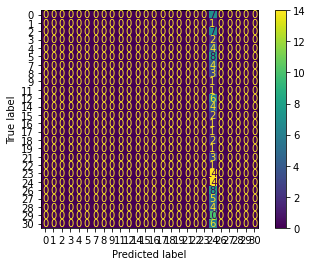

<Figure size 1080x1080 with 0 Axes>

In [122]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,features_test_transformed, y_test)  
plt.figure(figsize=(15, 15))
plt.show()

In [123]:
print(classification_report(y_test,clf.predict(features_test_transformed)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          21       0.00    

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
# Adding to the Dataframe for scores
df_score["SVM Classifier"] = [score]
df_score

,MultinomialNB,Logistic regression,Decision tree,Random Forest,SVM Classifier
0,0.35,0.341667,0.225,0.133333,0.116667


----------

# Training models on tf-idf vectors

In [125]:
# Appending to our score df
df_score.loc[1] = [0,0,0,0,0]

### MultinomialNB

In [126]:
from sklearn.naive_bayes import MultinomialNB
# train the model
clf = MultinomialNB()
clf.fit(tf_features_train_transformed, y_train)
score = clf.score(tf_features_test_transformed, y_test)
clf.score(tf_features_test_transformed, y_test)

0.15

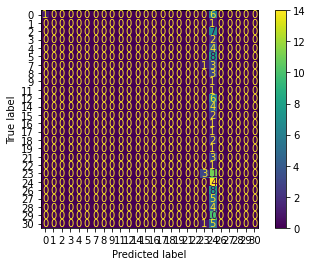

<Figure size 1080x1080 with 0 Axes>

In [127]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,tf_features_test_transformed, y_test)  
plt.figure(figsize=(15, 15))
plt.show()

In [128]:
print(classification_report(y_test,clf.predict(tf_features_test_transformed)))

              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          21       0.00    

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [129]:
df_score.iloc[1,0] = score
df_score

,MultinomialNB,Logistic regression,Decision tree,Random Forest,SVM Classifier
0,0.35,0.341667,0.225,0.133333,0.116667
1,0.15,0.000000,0.000,0.000000,0.000000


### Logistic regression

In [130]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=12345)
clf.fit(tf_features_train_transformed, y_train)
score = clf.score(tf_features_test_transformed, y_test)
clf.score(tf_features_test_transformed, y_test)

0.24166666666666667

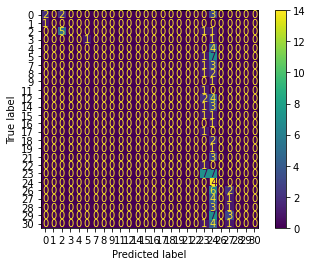

<Figure size 1080x1080 with 0 Axes>

In [131]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,tf_features_test_transformed, y_test)  
plt.figure(figsize=(15, 15))
plt.show()

In [132]:
print(classification_report(y_test,clf.predict(tf_features_test_transformed)))

              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.00      0.00      0.00         1
           2       0.71      0.71      0.71         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          21       0.00    

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
df_score.iloc[1,1] = score
df_score

,MultinomialNB,Logistic regression,Decision tree,Random Forest,SVM Classifier
0,0.35,0.341667,0.225,0.133333,0.116667
1,0.15,0.241667,0.000,0.000000,0.000000


### Decision tree

In [134]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1234)
clf.fit(tf_features_train_transformed, y_train)
score = clf.score(tf_features_test_transformed, y_test)
clf.score(tf_features_test_transformed, y_test)

0.21666666666666667

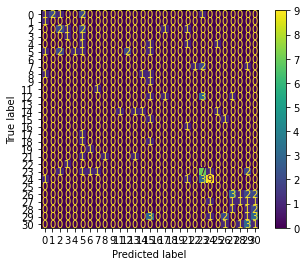

<Figure size 1080x1080 with 0 Axes>

In [135]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,tf_features_test_transformed, y_test)  
plt.figure(figsize=(15, 15))
plt.show()

In [136]:
print(classification_report(y_test,clf.predict(tf_features_test_transformed)))

              precision    recall  f1-score   support

           0       0.20      0.14      0.17         7
           1       0.00      0.00      0.00         1
           2       0.33      0.29      0.31         7
           3       0.33      0.50      0.40         2
           4       0.00      0.00      0.00         4
           5       0.09      0.12      0.11         8
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         0
          14       0.50      0.25      0.33         4
          15       0.10      0.50      0.17         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00    

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/pyth

In [137]:
df_score.iloc[1,2] = score
df_score

,MultinomialNB,Logistic regression,Decision tree,Random Forest,SVM Classifier
0,0.35,0.341667,0.225000,0.133333,0.116667
1,0.15,0.241667,0.216667,0.000000,0.000000


### Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=1234)
clf.fit(tf_features_train_transformed, y_train)
score = clf.score(tf_features_test_transformed, y_test)
clf.score(tf_features_test_transformed, y_test)

0.13333333333333333

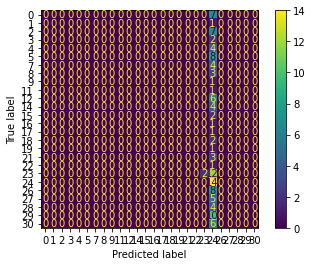

<Figure size 1080x1080 with 0 Axes>

In [139]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,tf_features_test_transformed, y_test)  
plt.figure(figsize=(15, 15))
plt.show()

In [140]:
print(classification_report(y_test,clf.predict(tf_features_test_transformed)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          21       0.00    

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
df_score.iloc[1,3] = score
df_score

,MultinomialNB,Logistic regression,Decision tree,Random Forest,SVM Classifier
0,0.35,0.341667,0.225000,0.133333,0.116667
1,0.15,0.241667,0.216667,0.133333,0.000000


### SVM Classifier

In [142]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(tf_features_train_transformed, y_train)
score = clf.score(tf_features_test_transformed, y_test)
clf.score(tf_features_test_transformed, y_test)

0.11666666666666667

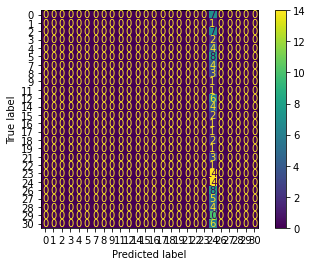

<Figure size 1080x1080 with 0 Axes>

In [143]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,tf_features_test_transformed, y_test)  
plt.figure(figsize=(15, 15))
plt.show()

In [144]:
print(classification_report(y_test,clf.predict(tf_features_test_transformed)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          21       0.00    

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [145]:
df_score.iloc[1,4] = score
df_score

,MultinomialNB,Logistic regression,Decision tree,Random Forest,SVM Classifier
0,0.35,0.341667,0.225000,0.133333,0.116667
1,0.15,0.241667,0.216667,0.133333,0.116667


-----

# Training on Glove vectors

In [146]:
# Appending to our score df
df_score.loc[2] = [0,0,0,0,0]

df_score.iloc[2,0] = 0
df_score

,MultinomialNB,Logistic regression,Decision tree,Random Forest,SVM Classifier
0,0.35,0.341667,0.225000,0.133333,0.116667
1,0.15,0.241667,0.216667,0.133333,0.116667
2,0.00,0.000000,0.000000,0.000000,0.000000


### Logistic regression

In [147]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=12345)
clf.fit(glove_features_train_transformed, y_train)
score = clf.score(glove_features_test_transformed, y_test)
clf.score(glove_features_test_transformed, y_test)

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.2833333333333333

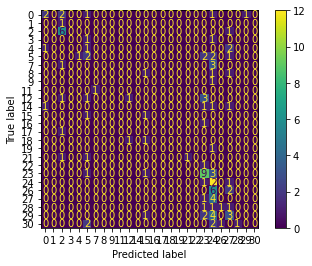

<Figure size 1080x1080 with 0 Axes>

In [148]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,glove_features_test_transformed, y_test)  
plt.figure(figsize=(15, 15))
plt.show()

In [149]:
print(classification_report(y_test,clf.predict(glove_features_test_transformed)))

              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.00      0.00      0.00         1
           2       0.46      0.86      0.60         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.18      0.25      0.21         8
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.50      0.17      0.25         6
          14       0.00      0.00      0.00         4
          15       0.20      0.50      0.29         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          21       1.00    

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [150]:
df_score.iloc[2,1] = score
df_score

,MultinomialNB,Logistic regression,Decision tree,Random Forest,SVM Classifier
0,0.35,0.341667,0.225000,0.133333,0.116667
1,0.15,0.241667,0.216667,0.133333,0.116667
2,0.00,0.283333,0.000000,0.000000,0.000000


### Decision tree

In [151]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1234)
clf.fit(glove_features_train_transformed, y_train)
score = clf.score(glove_features_test_transformed, y_test)
clf.score(glove_features_test_transformed, y_test)

0.16666666666666666

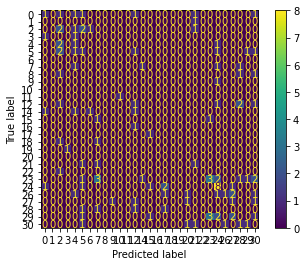

<Figure size 1080x1080 with 0 Axes>

In [152]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,glove_features_test_transformed, y_test)  
plt.figure(figsize=(15, 15))
plt.show()

In [153]:
print(classification_report(y_test,clf.predict(glove_features_test_transformed)))

              precision    recall  f1-score   support

           0       0.25      0.14      0.18         7
           1       0.00      0.00      0.00         1
           2       0.18      0.29      0.22         7
           3       0.00      0.00      0.00         2
           4       0.12      0.25      0.17         4
           5       0.10      0.12      0.11         8
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.14      0.17      0.15         6
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00    

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/pyth

In [154]:
df_score.iloc[2,2] = score
df_score

,MultinomialNB,Logistic regression,Decision tree,Random Forest,SVM Classifier
0,0.35,0.341667,0.225000,0.133333,0.116667
1,0.15,0.241667,0.216667,0.133333,0.116667
2,0.00,0.283333,0.166667,0.000000,0.000000


### Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=1234)
clf.fit(glove_features_train_transformed, y_train)
score = clf.score(glove_features_test_transformed, y_test)
clf.score(glove_features_test_transformed, y_test)

0.23333333333333334

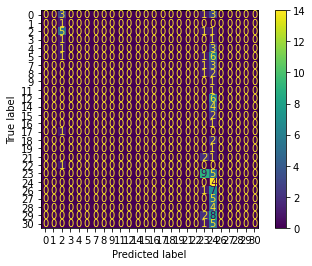

<Figure size 1080x1080 with 0 Axes>

In [156]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,glove_features_test_transformed, y_test)  
plt.figure(figsize=(15, 15))
plt.show()

In [157]:
print(classification_report(y_test,clf.predict(glove_features_test_transformed)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         1
           2       0.36      0.71      0.48         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          21       0.00    

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [158]:
df_score.iloc[2,3] = score
df_score

,MultinomialNB,Logistic regression,Decision tree,Random Forest,SVM Classifier
0,0.35,0.341667,0.225000,0.133333,0.116667
1,0.15,0.241667,0.216667,0.133333,0.116667
2,0.00,0.283333,0.166667,0.233333,0.000000


### SVM Classifier

In [159]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(glove_features_train_transformed, y_train)
score = clf.score(glove_features_test_transformed, y_test)
clf.score(glove_features_test_transformed, y_test)

0.11666666666666667

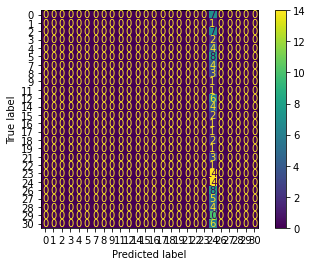

<Figure size 1080x1080 with 0 Axes>

In [160]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,glove_features_test_transformed, y_test)  
plt.figure(figsize=(15, 15))
plt.show()

In [161]:
print(classification_report(y_test,clf.predict(glove_features_test_transformed)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          21       0.00    

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [162]:
df_score.iloc[2,4] = score
df_score

,MultinomialNB,Logistic regression,Decision tree,Random Forest,SVM Classifier
0,0.35,0.341667,0.225000,0.133333,0.116667
1,0.15,0.241667,0.216667,0.133333,0.116667
2,0.00,0.283333,0.166667,0.233333,0.116667


In [163]:
df_score['Data'] = ['Count-Vectorizer','TF-IDF Vectorizer','Glove Vectorizer']

In [164]:
df_score

,MultinomialNB,Logistic regression,Decision tree,Random Forest,SVM Classifier,Data
0,0.35,0.341667,0.225000,0.133333,0.116667,Count-Vectorizer
1,0.15,0.241667,0.216667,0.133333,0.116667,TF-IDF Vectorizer
2,0.00,0.283333,0.166667,0.233333,0.116667,Glove Vectorizer


In [165]:
# setting student id as index but permanently
df_score.set_index("Data", inplace=True)

In [166]:
df_score

,MultinomialNB,Logistic regression,Decision tree,Random Forest,SVM Classifier
Data,,,,,
Count-Vectorizer,0.35,0.341667,0.225000,0.133333,0.116667
TF-IDF Vectorizer,0.15,0.241667,0.216667,0.133333,0.116667
Glove Vectorizer,0.00,0.283333,0.166667,0.233333,0.116667


<AxesSubplot:xlabel='Data'>

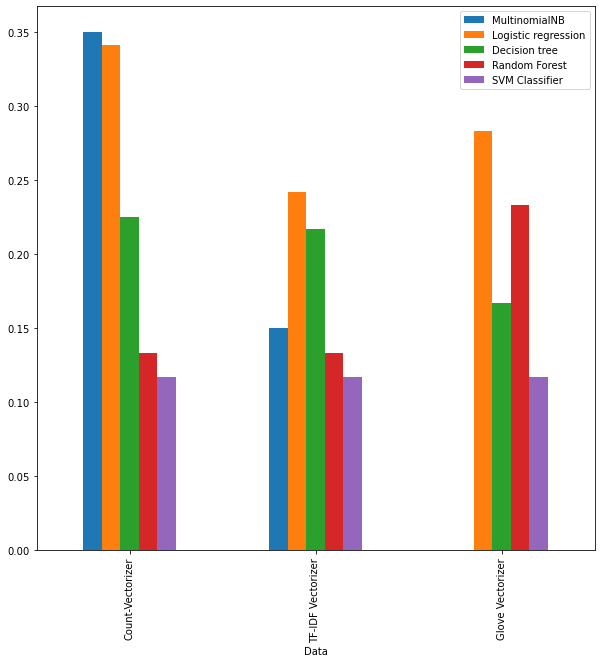

In [167]:
df_score.plot(kind='bar',figsize=(10, 10))

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<h1><p style="text-align: center;"> Next Part </p></h1>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

# Model Deployment:

Once you finalize the model, write a python script that can be used to provide predictions on new complaints. Your prediction module should follow the following structure:

- predict.py
-- models
-- - model files (.h5 or .pickle files)
-- test_data
- README.MD

predict.py should contain the logic to load the saved model in models directory and provide predictions on tickets stored in the test_data folder. Your predictions should also include guidance on who should respond to the customer complaint.

----

For this the solution will be in the folder named solution.
- I am going to save the logistic regression model
- And i am going to use the count-vectorizer and the glove vectorizer to convert words to numbers for our test file

In [168]:
# Logistic regression trained on count vectorizer
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=12345)
log_clf.fit(features_train_transformed, y_train)
score = log_clf.score(features_test_transformed, y_test)
log_clf.score(features_test_transformed, y_test)

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3416666666666667

In [169]:
# Logistic regression trained on count vectorizer
from sklearn.linear_model import LogisticRegression
glove_clf = LogisticRegression(random_state=12345)
glove_clf.fit(glove_features_train_transformed, y_train)
score = glove_clf.score(glove_features_test_transformed, y_test)
glove_clf.score(glove_features_test_transformed, y_test)

/home/infinity/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.2833333333333333

In [170]:
# saving the model and the vectorizers
import pickle
filename = './model_deployment/models/models.pkl'
with open(filename, 'wb') as f:
    pickle.dump((cnt_vectorizer, log_clf, glove_clf, labels_encoder), f)